## Dataset

#### History

This is a multivariate dataset introduced by R.A.Fisher (Father of Modern Statistics) for showcasing linear discriminant analysis. This is arguably the best known dataset in Feature Selection literature.


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

#### Description
The Iris dataset consists of 150 data instances. There are 3 classes (Iris Versicolor, Iris Setosa and Iris Virginica) each have 50 instances. 


For each flower we have the below data attributes 

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

To make our experiment easy we rename the classes  with numbers : 

    "0": setosa
    "1": versicolor
    "2": virginica
    

### Challenges

When we use the data with large number of features or dimensionality, models usually choke because

    1. Training time increases exponentially with number of features.
    2. Models have increasing risk of overfitting with increasing number of features.
    
To avoid the above mentioned problems while learning about data analysis, we use simple, well behaved, data that reduces the cognitive load, and makes it easier to debug as we are able to better comprehend the data we are working with.  

Hence, this is a good dataset to work on.

## Domain Information



Iris Plants are flowering plants with showy flowers. They are very popular among movie directors as it gives excellent background. 

They are predominantly found in dry, semi-desert, or colder rocky mountainous areas in Europe and Asia. They have long, erect flowering stems and can produce white, yellow, orange, pink, purple, lavender, blue or brown colored flowers. There are 260 to 300 types of iris.

![alt text](https://cdn-images-1.medium.com/max/1275/1*7bnLKsChXq94QjtAiRn40w.png)

As you could see, flowers have 3 sepals and 3 petals.  The sepals are usually spreading or drop downwards and the petals stand upright, partly behind the sepal bases. However, the length and width of the sepals and petals vary for each type.


### Setup Steps

In [1]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

ipython.magic("sx apt-get install graphviz")
ipython.magic("sx pip install graphviz")


['Requirement already satisfied: graphviz in /usr/local/lib/python3.6/dist-packages (0.10.1)']

#### Importing Required Packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#### Loading the data

In [0]:
# Load data
iris = load_iris()

In [4]:
# Checking for the type of iris
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [5]:
# Checking the keys
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
# Checking for the type of data
print(type(iris.data))

<class 'numpy.ndarray'>


In [7]:
# Checking for unique target or class values
print(set(iris.target))

{0, 1, 2}


In [8]:
# Let us see how the iris data looks
print(iris.data[::15])

[[5.1 3.5 1.4 0.2]
 [5.7 4.4 1.5 0.4]
 [4.8 3.1 1.6 0.2]
 [4.8 3.  1.4 0.3]
 [5.  2.  3.5 1. ]
 [6.6 3.  4.4 1.4]
 [5.5 2.6 4.4 1.2]
 [7.6 3.  6.6 2.1]
 [6.9 3.2 5.7 2.3]
 [7.7 3.  6.1 2.3]]


In [9]:
# Let us see how the labels 
print(iris.target[::15])

[0 0 0 0 1 1 1 2 2 2]


In [0]:
# Storing the data and labels into "X" and "y" varaibles
X = iris.data
y = iris.target

### Splitting the data into train and test sets 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Training and testing set ratio is 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
# Let us see the size of train and  test sets
X_train.shape, X_test.shape

((100, 4), (50, 4))

In [14]:
# Let us see first five rows of the training data
X_train[:5]

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ]])

### Training a  Knn Classifier 

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
neigh.predict(X_test)
neigh.score(X_test,y_test)

0.98

In [0]:
# Plot a graph showing accuracy vs number of neighbours for each value of n_neighbours from 1-20


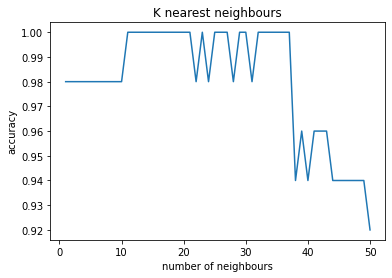

In [18]:
x = []
y = []

for i in range(1, 51):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train,y_train)
  neigh.predict(X_test)
  x.append(i)
  y.append(neigh.score(X_test,y_test))

plt.plot(x, y)
plt.xlabel('number of neighbours')
plt.ylabel('accuracy')
plt.title('K nearest neighbours')
plt.show()